In [39]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')

In [40]:
import warnings
warnings.filterwarnings(action='ignore')

In [41]:
fish.Species.unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [42]:
fish

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [43]:
fish_input=fish[['Weight','Length','Diagonal','Height','Width']]
fish_target=fish[['Species']]

In [44]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(fish_input,fish_target,random_state=42)

In [45]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
ss.fit(x_train)
train_scaled=ss.transform(x_train)
test_scaled=ss.transform(x_test)

In [46]:
from sklearn.linear_model import SGDClassifier

#max_iter==epoch

sc=SGDClassifier(loss='log',max_iter=10,random_state=42)
sc.fit(train_scaled,y_train)
print(sc.score(train_scaled,y_train))
print(sc.score(test_scaled,y_test))

0.773109243697479
0.775


In [47]:
#모델을 추가하여  이어서 훈련을 시킬 수 있다.

sc.partial_fit(train_scaled,y_train)
print(sc.score(train_scaled,y_train))
print(sc.score(test_scaled,y_test))

0.8151260504201681
0.8


In [48]:
#epoch가 너무작으면 과소적합, 너무 크면 과대적합
# 이 사이에 훈련을 종료 시키기 위해, 조기종료 사용

import numpy as np

sc=SGDClassifier(loss='log',random_state=42)
train_score=[]
test_score=[]
classes=np.unique(y_train)

In [49]:
for _ in range(300):            #epoch==300
    sc.partial_fit(train_scaled,y_train,classes)
    train_score.append(sc.score(train_scaled,y_train))
    test_score.append(sc.score(test_scaled,y_test))

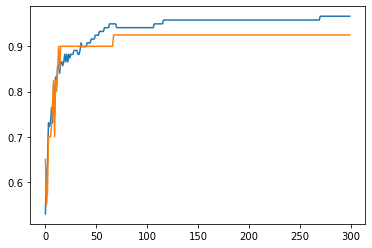

In [50]:
import matplotlib.pyplot as plt
# 파란선= train_score

plt.plot(train_score)
plt.plot(test_score)

In [51]:
# 위 그래프를 통해 100번째 epoch부터 과대적합 발생. 따라서 epoch==100으로 지정
#tol=None, 조기종료를 허용하지않고 max_iter만큼 다 순회하게 만듬.

sc=SGDClassifier(loss='log',max_iter=100,tol=None,random_state=42)

sc.fit(train_scaled,y_train)
print(sc.score(train_scaled,y_train))
print(sc.score(test_scaled,y_test))



0.957983193277311
0.925


In [ ]:
#다중분류 손실함수=크로스엔트로피,소프트 맥스=> 시그모이드 함수로 인해 정규화를 하여 합이 1이되도록함
#이진분류 =이진크로스엔트로피